In [127]:
import pandas as pd

In [128]:
df = pd.read_csv("NORS_20250803 (3).CSV")

C:\Users\user.DESKTOP-OMQ89VA\AppData\Local\Temp\ipykernel_1956\2764953100.py:1: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("NORS_20250803 (3).CSV")


In [129]:
df.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type
0,2016,1,New Jersey,Food,NaN,NaN,NaN,NaN,47,0.0,47.0,0.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,9,Massachusetts,Person-to-person,Norovirus,NaN,Suspected,Other,41,0.0,41.0,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1,Minnesota,Food,Norovirus Genogroup IX,GII.P15 GIX.1,Confirmed,Restaurant: Sit-down dining,23,0.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1,Massachusetts,Indeterminate/unknown,Norovirus,NaN,Suspected,Long-term care/nursing home/assisted living fa...,7,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1,North Carolina,Person-to-person,Norovirus unknown,NaN,Confirmed,Long-term care/nursing home/assisted living fa...,23,1.0,23.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN


### How many total outbreaks were reported? 

### What is the average number of illnsses per outbreak ?

### What is the most common cause (etiology ) of outbreaks ?

### Data Overview

In this section, we take an initial look at the dataset containing reported disease outbreaks.  
We'll do the following:
- Display the first 5 rows of the dataset
- Show the shape of the dat

### Dataset Dimensions & Data Types

- The dataset contains **66,713 rows** and **19 columns**.
- Below is a quick overview of the data types:
  - `int64`: Used for whole numbers like `Year`, `Month`, and `Illnesses`.
  - `float64`: Used for numeric data that might include decimals (e.g., `Deaths`, `Hospitalizations`).
  - `object`: Used for textual data (e.g., `State`, `Etiology`, `Animal Type`).

This helps us understand how we can manipulate and analyze each column. For example:
- Numerical columns can be used for aggregation (mean, sum).
- Categorical/text columns are useful for grouping and filtering.

In [130]:
df.shape

(66713, 19)

In [131]:
df.dtypes

Year                              int64
Month                             int64
State                            object
Primary Mode                     object
Etiology                         object
Serotype or Genotype             object
Etiology Status                  object
Setting                          object
Illnesses                         int64
Hospitalizations                float64
Info On Hospitalizations        float64
Deaths                          float64
Info On Deaths                  float64
Food Vehicle                     object
Food Contaminated Ingredient     object
IFSAC Category                   object
Water Exposure                   object
Water Type                       object
Animal Type                      object
dtype: object

In [132]:
df.isnull().sum()

Year                                0
Month                               0
State                               0
Primary Mode                        0
Etiology                        16338
Serotype or Genotype            50243
Etiology Status                 16338
Setting                          5909
Illnesses                           0
Hospitalizations                 8558
Info On Hospitalizations         8233
Deaths                           7928
Info On Deaths                   8250
Food Vehicle                    54267
Food Contaminated Ingredient    63963
IFSAC Category                  55008
Water Exposure                  63607
Water Type                      63983
Animal Type                     66126
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(1428)

In [134]:
df.info

<bound method DataFrame.info of        Year  Month           State           Primary Mode  \
0      2016      1      New Jersey                   Food   
1      2018      9   Massachusetts       Person-to-person   
2      2023      1       Minnesota                   Food   
3      2023      1   Massachusetts  Indeterminate/unknown   
4      2023      1  North Carolina       Person-to-person   
...     ...    ...             ...                    ...   
66708  1971     11          Alaska                  Water   
66709  1971     11        New York                  Water   
66710  1971     11        Oklahoma                  Water   
66711  1971     11           Texas                  Water   
66712  1971     12      California                  Water   

                     Etiology Serotype or Genotype Etiology Status  \
0                         NaN                  NaN             NaN   
1                   Norovirus                  NaN       Suspected   
2      Norovirus Genogrou

### Missing Values Summary

Several columns contain missing values:
- Columns like `Etiology`, `Serotype or Genotype`, and `Food Vehicle` have a significant number of missing entries.
- Other columns such as `Hospitalizations`, `Deaths`, and `Info On Hospitalizations` have partial missing data.

We will handle missing data case-by-case, depending on the analysis needs. Some may be dropped, others might be imputed or left as-is if not critical.


In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df.drop(columns=[
    'Serotype or Genotype',
    'Food Contaminated Ingredient',
    'Water Exposure',
    'Water Type',
    'Animal Type'
], inplace=True)

In [137]:
df

,Year,Month,State,Primary Mode,Etiology,Etiology Status,Setting,Illnesses,Hospitalizations,Info On Hospitalizations,Deaths,Info On Deaths,Food Vehicle,IFSAC Category
0,2016,1,New Jersey,Food,NaN,NaN,NaN,47,0.0,47.0,0.0,47.0,NaN,NaN
1,2018,9,Massachusetts,Person-to-person,Norovirus,Suspected,Other,41,0.0,41.0,0.0,41.0,NaN,NaN
2,2023,1,Minnesota,Food,Norovirus Genogroup IX,Confirmed,Restaurant: Sit-down dining,23,0.0,23.0,0.0,23.0,NaN,NaN
3,2023,1,Massachusetts,Indeterminate/unknown,Norovirus,Suspected,Long-term care/nursing home/assisted living fa...,7,0.0,0.0,0.0,0.0,NaN,NaN
4,2023,1,North Carolina,Person-to-person,Norovirus unknown,Confirmed,Long-term care/nursing home/assisted living fa...,23,1.0,23.0,0.0,23.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66708,1971,11,Alaska,Water,Shigella sonnei,Confirmed,Mobile home/trailer park,89,NaN,NaN,0.0,NaN,NaN,NaN
66709,1971,11,New York,Water,Unknown,Suspected,Restaurant,750,NaN,NaN,0.0,NaN,NaN,NaN
66710,1971,11,Oklahoma,Water,Hepatitis A,Confirmed,Community/municipality,50,NaN,NaN,0.0,NaN,NaN,NaN
66711,1971,11,Texas,Water,Hepatitis A,Confirmed,Farm/dairy/agricultural setting,3,NaN,NaN,0.0,NaN,NaN,NaN


### Dropping Columns with High Missing Values

We dropped the following columns due to their high percentage of missing data (mostly above 80%):

- Serotype or Genotype
- Food Contaminated Ingredient
- Water Exposure
- Water Type
- Animal Type

These columns are not essential for our current analysis and could negatively affect our results.

In [138]:
df.shape

(65285, 14)

In [139]:
df.columns

Index(['Year', 'Month', 'State', 'Primary Mode', 'Etiology', 'Etiology Status',
       'Setting', 'Illnesses', 'Hospitalizations', 'Info On Hospitalizations',
       'Deaths', 'Info On Deaths', 'Food Vehicle', 'IFSAC Category'],
      dtype='object')

In [140]:
df.isnull().sum()

Year                            0
Month                           0
State                           0
Primary Mode                    0
Etiology                    15850
Etiology Status             15850
Setting                      5525
Illnesses                       0
Hospitalizations             8163
Info On Hospitalizations     7862
Deaths                       7531
Info On Deaths               7880
Food Vehicle                52864
IFSAC Category              53604
dtype: int64

### How many total outbreaks were reported?

In [141]:
total_outbreaks = len(df)
total_outbreaks

65285

### Total Number of Outbreaks Reported

We have a total of **65,285 outbreaks** recorded in the dataset. Each row represents one reported outbreak.


### What is the average number of illnesses per outbreak?

## 📌 Average Number of Illnesses Per Outbreak

The average number of illnesses per outbreak is approximately **[put number here]**.  
This value is calculated by taking the mean of the *Illnesses* column across all reported outbreaks.

The average number of illnesses per outbreak is approximately **33.65**.  
This value was calculated by taking the mean of the *Illnesses* column across all 65,285 reported outbreaks.

In [142]:
avg_illnesses = df["Illnesses"].mean()
avg_illnesses

np.float64(33.64774450486329)

### What is the most common cause (etiology ) of outbreaks ?

## Most Common Cause (Etiology) of Outbreaks

The most common cause of reported outbreaks is **Norovirus Genogroup II**,  
which was responsible for **9,141** outbreaks.

This virus is known for spreading quickly in group settings like schools, hospitals, and cruise ships, often through contaminated food or surfaces.

In [143]:
most_common_cause = df["Etiology"].value_counts().idxmax()
count_most_common = df["Etiology"].value_counts().max()

most_common_cause, count_most_common

('Norovirus Genogroup II', 9141)

### What is the most common cause (etiology ) of outbreaks ?

In [145]:
df.columns[df.columns.duplicated()]

Index([], dtype='object')

In [118]:
df.columns

Index(['Year', 'Month', 'State', 'Primary Mode', 'Etiology', 'Etiology Status',
       'Setting', 'Illnesses', 'Hospitalizations', 'Info On Hospitalizations',
       'Deaths', 'Info On Deaths', 'Food Vehicle', 'IFSAC Category'],
      dtype='object')

In [119]:
df['Etiology'].value_counts().head(10)

Etiology
Norovirus Genogroup II                     9141
Norovirus                                  9090
Norovirus unknown                          8530
Salmonella enterica                        4121
Norovirus Genogroup I                      4091
Escherichia coli, Shiga toxin-producing    1217
Shigella sonnei                            1160
Clostridium perfringens                     926
Legionella pneumophila                      762
Staphylococcus aureus                       626
Name: count, dtype: int64

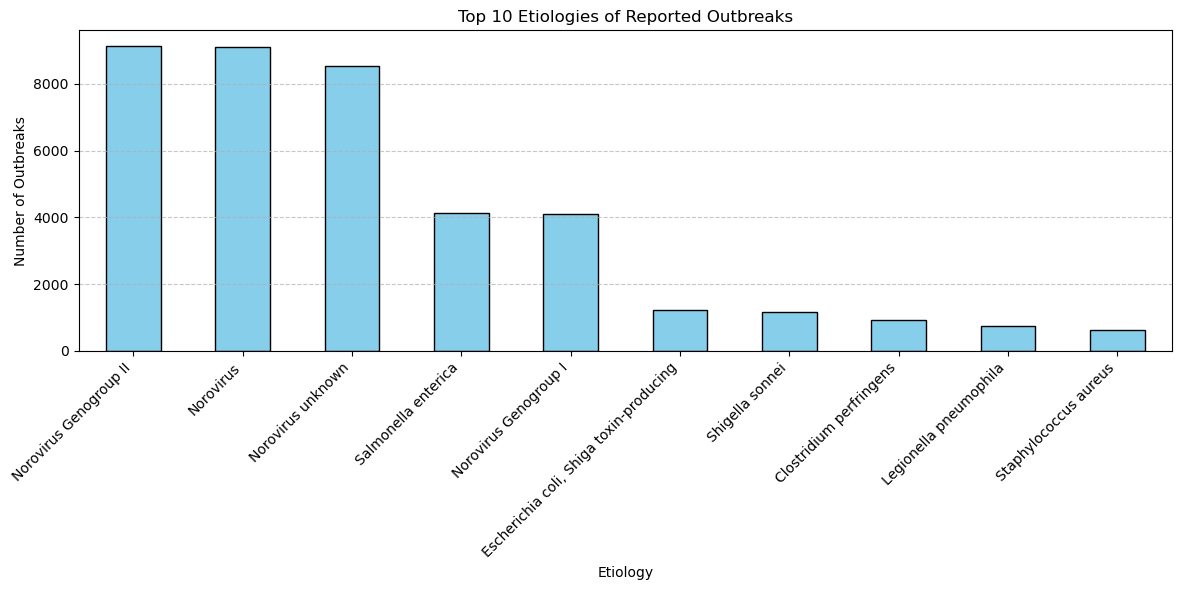

In [120]:
import matplotlib.pyplot as plt

top_causes = df['Etiology'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_causes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Etiologies of Reported Outbreaks')
plt.xlabel('Etiology')
plt.ylabel('Number of Outbreaks')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
### answer 1 

Are person-to-person outbreaks more likely to be viral or bacterial?
 أنواع الأمراض الشائعة

In [124]:
# نفلتر التفشيات اللي طريق انتقالها person-to-person
person_to_person_df = df[df['Primary Mode'] == 'Person-to-Person']

In [125]:
# نضيف عمود جديد يسمّي نوع المرض: viral أو bacterial أو other
def classify_pathogen(etiology):
    if etiology in viral:
        return 'Viral'
    elif etiology in bacterial:
        return 'Bacterial'
    else:
        return 'Other'

person_to_person_df['Type'] = person_to_person_df['Etiology'].apply(classify_pathogen)

# نعد كل نوع
person_to_person_df['Type'].value_counts()

Series([], Name: count, dtype: int64)

In [126]:
person_to_person_df['Etiology'].unique()

array([], dtype=object)